In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1

In [2]:
df1=pd.read_json('logins.json')

In [3]:
df1

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [4]:
df1.isna().any()

login_time    False
dtype: bool

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


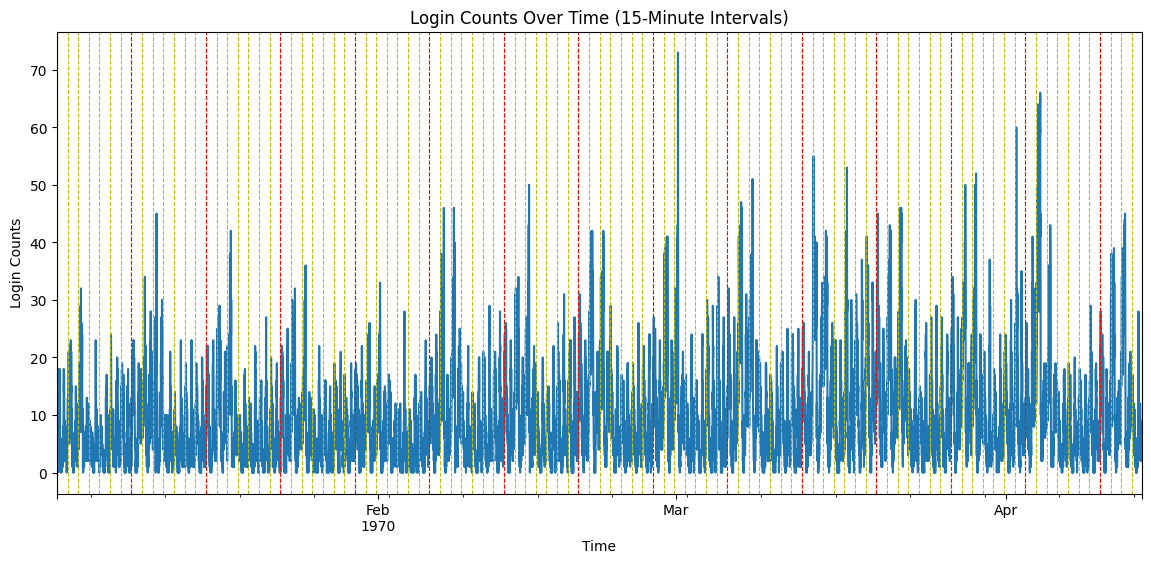

In [6]:
df1['login_counts'] = 1  # Create a new column with a constant value (1) for counting

# Set 'login_time' as the index
df1.set_index('login_time', inplace=True)

# Resample the data in 15-minute intervals and sum the counts in each interval
resampled_data = df1.resample('15T').sum()
mean_by_time = resampled_data.groupby(resampled_data.index.time).mean()
# Visualize the time series
plt.figure(figsize=(14, 6))
resampled_data['login_counts'].plot(title='Login Counts Over Time (15-Minute Intervals)', legend=False)
plt.xlabel('Time')
plt.ylabel('Login Counts')

for i in range(0, len(resampled_data), 24 * 4):
    plt.axvline(resampled_data.index[i], color='y', linestyle='--', linewidth=0.8)
for i in range(0, len(resampled_data), 24 * 4*7):
    plt.axvline(resampled_data.index[i], color='r', linestyle='--', linewidth=0.8)

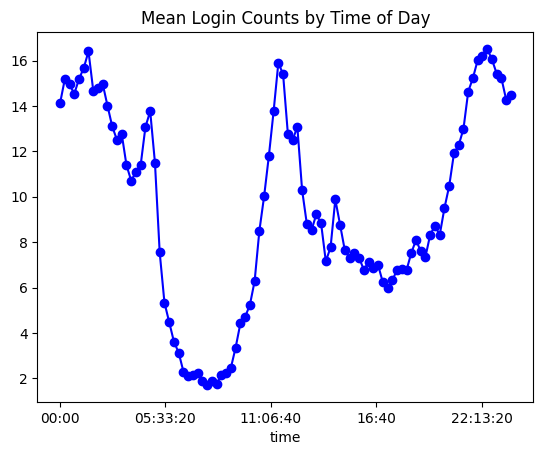

In [7]:
mean_by_time = resampled_data.groupby(resampled_data.index.time).mean()
mean_by_time['login_counts'].plot(title='Mean Login Counts by Time of Day', marker='o', linestyle='-', color='blue')
plt.show()

In [8]:
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   login_counts  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


## Part 2

1. It is understood that the managers of city operations are proposing to reimburse the tool between two cities of Gotham and Metropolis. I think the measure of success of this plan should be quantitatively measurable. I would give incentives (5 %)to drivers who drive from  to Gotham from metropolis at weekday nights, and also to drivers who drive from Gotham to metropolis during the day of weekdays. This would be a good incentive for driver to drive more and also to the public as this will not increase the cost of taking ride, and should increase the revenue through economic activity in both cities.

2. I think the measure of effectiveness of the plan should be based upon whether the two cities increased their monthly revenue after the plan is executed. 
- Count the total rides in a month (after plan executed) across the cities. Evaluate how much would have been the total toll amount, if it was not reimbursed.
- Calculate the total amount of incentives given to driver who drove across the cities as explained above.
- sum above two to get total additional cost to execute the plan.
- Obtain the total revenue generated in two cities in a month time after the plan is executed.
- For this strategy to work, the difference between the total revene generated after and before the execution of polan should excede the total cost required to implement the plan.


I think we can use t-test for this problem. The null hypothesis would be that economy didn't increase after the implementation of plan. We can use 5 % significance level and decide whether we have to accept to reject the null hypothesis. 

Based upon above calculation, the authority can decide if giving incentives really worked and if incentive % should be increased or decreased. This also gives idea if people taking ride really increased compared to previous month.

In [9]:
df2=pd.read_json('ultimate_data_challenge.json')

In [10]:
df2

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
df2.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [13]:
df2.dropna(subset=['phone', 'avg_rating_by_driver'], inplace=True)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49406 non-null  object 
 1   trips_in_first_30_days  49406 non-null  int64  
 2   signup_date             49406 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               49406 non-null  float64
 5   last_trip_date          49406 non-null  object 
 6   phone                   49406 non-null  object 
 7   surge_pct               49406 non-null  float64
 8   ultimate_black_user     49406 non-null  bool   
 9   weekday_pct             49406 non-null  float64
 10  avg_dist                49406 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [15]:
df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean(), inplace=True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49406 non-null  object 
 1   trips_in_first_30_days  49406 non-null  int64  
 2   signup_date             49406 non-null  object 
 3   avg_rating_of_driver    49406 non-null  float64
 4   avg_surge               49406 non-null  float64
 5   last_trip_date          49406 non-null  object 
 6   phone                   49406 non-null  object 
 7   surge_pct               49406 non-null  float64
 8   ultimate_black_user     49406 non-null  bool   
 9   weekday_pct             49406 non-null  float64
 10  avg_dist                49406 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [17]:
df2

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.70000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.00000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.30000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.60000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.40000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.00000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,4.60172,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.00000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.00000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [18]:
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])
df2['ultimate_black_user'] = df2['ultimate_black_user'].astype(int)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49406 non-null  object        
 1   trips_in_first_30_days  49406 non-null  int64         
 2   signup_date             49406 non-null  datetime64[ns]
 3   avg_rating_of_driver    49406 non-null  float64       
 4   avg_surge               49406 non-null  float64       
 5   last_trip_date          49406 non-null  datetime64[ns]
 6   phone                   49406 non-null  object        
 7   surge_pct               49406 non-null  float64       
 8   ultimate_black_user     49406 non-null  int64         
 9   weekday_pct             49406 non-null  float64       
 10  avg_dist                49406 non-null  float64       
 11  avg_rating_by_driver    49406 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(2), ob

In [20]:
df2['phone'].unique()

array(['iPhone', 'Android'], dtype=object)

In [21]:
df2['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [22]:
## Do one hot encoding for remaining categorical columns 'city' and 'phone'
df2 = pd.get_dummies(df2, columns=['phone', 'city'])


In [23]:
df2

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.70000,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,1,0
1,0,2014-01-29,5.00000,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,1,0,0
2,3,2014-01-06,4.30000,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,1,0,0
3,9,2014-01-10,4.60000,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,1,0
4,14,2014-01-27,4.40000,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.00000,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,0,1,0,1,0
49996,1,2014-01-24,4.60172,1.00,2014-01-25,0.0,0,0.0,0.00,4.0,0,1,1,0,0
49997,0,2014-01-31,5.00000,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,1,0,0,0,1
49998,2,2014-01-14,3.00000,1.00,2014-01-15,0.0,0,100.0,4.58,3.5,0,1,1,0,0


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  49406 non-null  int64         
 1   signup_date             49406 non-null  datetime64[ns]
 2   avg_rating_of_driver    49406 non-null  float64       
 3   avg_surge               49406 non-null  float64       
 4   last_trip_date          49406 non-null  datetime64[ns]
 5   surge_pct               49406 non-null  float64       
 6   ultimate_black_user     49406 non-null  int64         
 7   weekday_pct             49406 non-null  float64       
 8   avg_dist                49406 non-null  float64       
 9   avg_rating_by_driver    49406 non-null  float64       
 10  phone_Android           49406 non-null  uint8         
 11  phone_iPhone            49406 non-null  uint8         
 12  city_Astapor            49406 non-null  uint8 

array([[<Axes: title={'center': 'trips_in_first_30_days'}>,
        <Axes: title={'center': 'signup_date'}>,
        <Axes: title={'center': 'avg_rating_of_driver'}>,
        <Axes: title={'center': 'avg_surge'}>],
       [<Axes: title={'center': 'last_trip_date'}>,
        <Axes: title={'center': 'surge_pct'}>,
        <Axes: title={'center': 'ultimate_black_user'}>,
        <Axes: title={'center': 'weekday_pct'}>],
       [<Axes: title={'center': 'avg_dist'}>,
        <Axes: title={'center': 'avg_rating_by_driver'}>,
        <Axes: title={'center': 'phone_Android'}>,
        <Axes: title={'center': 'phone_iPhone'}>],
       [<Axes: title={'center': 'city_Astapor'}>,
        <Axes: title={'center': "city_King's Landing"}>,
        <Axes: title={'center': 'city_Winterfell'}>, <Axes: >]],
      dtype=object)

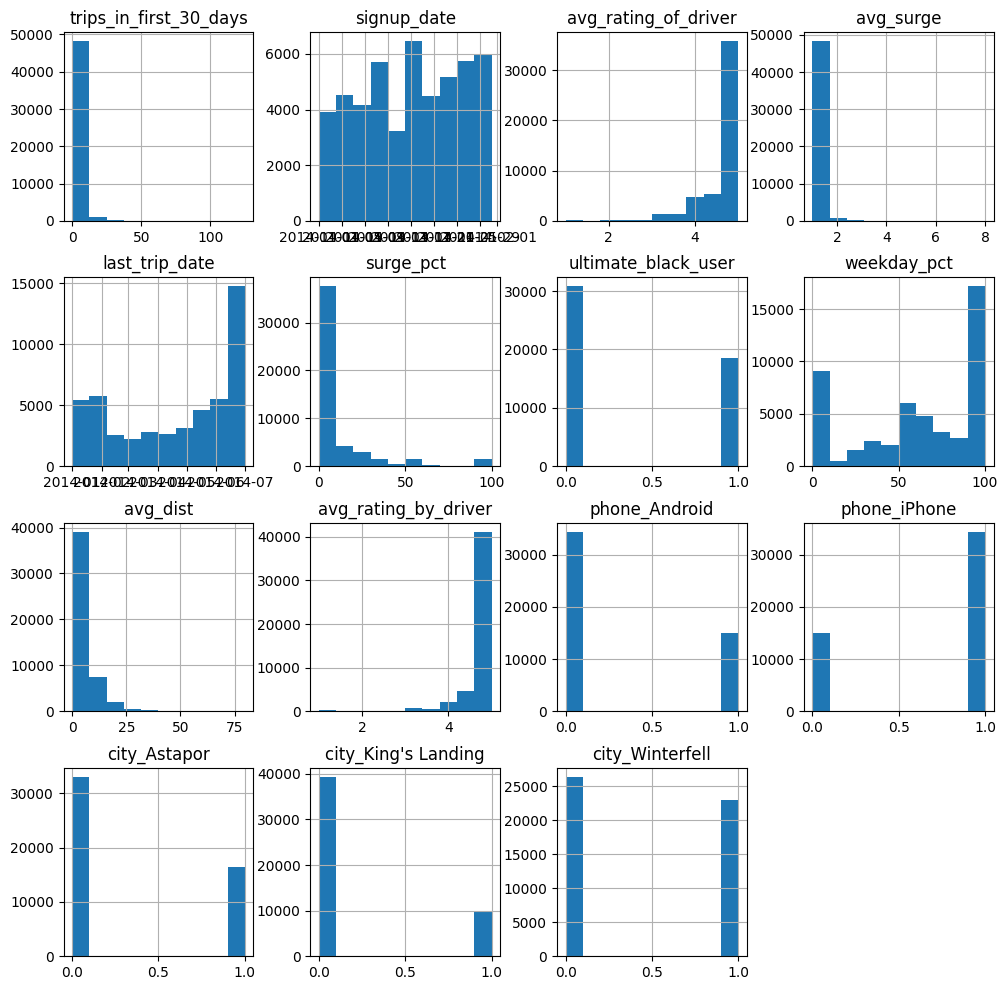

In [25]:
df2.hist(figsize=(12,12))

In [26]:
# want to create a target column 'retained' such that subscription was kept for at least 30 days
timedelta = df2['last_trip_date'] - df2['signup_date']


In [27]:
## also add one more feature for the maximum days of subscription
df2['duration'] = timedelta
df2['retained'] = (timedelta >= pd.Timedelta(days=30)).astype(int)

In [28]:
df2

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,duration,retained
0,4,2014-01-25,4.70000,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,1,0,143 days,1
1,0,2014-01-29,5.00000,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,1,0,0,96 days,1
2,3,2014-01-06,4.30000,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,1,0,0,1 days,0
3,9,2014-01-10,4.60000,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,1,0,170 days,1
4,14,2014-01-27,4.40000,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1,0,0,0,1,47 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.00000,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,0,1,0,1,0,131 days,1
49996,1,2014-01-24,4.60172,1.00,2014-01-25,0.0,0,0.0,0.00,4.0,0,1,1,0,0,1 days,0
49997,0,2014-01-31,5.00000,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,1,0,0,0,1,111 days,1
49998,2,2014-01-14,3.00000,1.00,2014-01-15,0.0,0,100.0,4.58,3.5,0,1,1,0,0,1 days,0


In [29]:
df2['retained'].value_counts()

1    36793
0    12613
Name: retained, dtype: int64

In [30]:
## Fraction retained
print('retained fraction', 36793/49406 )

retained fraction 0.7447071205926405


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   trips_in_first_30_days  49406 non-null  int64          
 1   signup_date             49406 non-null  datetime64[ns] 
 2   avg_rating_of_driver    49406 non-null  float64        
 3   avg_surge               49406 non-null  float64        
 4   last_trip_date          49406 non-null  datetime64[ns] 
 5   surge_pct               49406 non-null  float64        
 6   ultimate_black_user     49406 non-null  int64          
 7   weekday_pct             49406 non-null  float64        
 8   avg_dist                49406 non-null  float64        
 9   avg_rating_by_driver    49406 non-null  float64        
 10  phone_Android           49406 non-null  uint8          
 11  phone_iPhone            49406 non-null  uint8          
 12  city_Astapor            49406 no

In [32]:
df2['duration'] = df2['duration'].dt.days

In [33]:
df2['duration'] = df2['duration'].astype(str).str.replace(' days', '').astype(int)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  49406 non-null  int64         
 1   signup_date             49406 non-null  datetime64[ns]
 2   avg_rating_of_driver    49406 non-null  float64       
 3   avg_surge               49406 non-null  float64       
 4   last_trip_date          49406 non-null  datetime64[ns]
 5   surge_pct               49406 non-null  float64       
 6   ultimate_black_user     49406 non-null  int64         
 7   weekday_pct             49406 non-null  float64       
 8   avg_dist                49406 non-null  float64       
 9   avg_rating_by_driver    49406 non-null  float64       
 10  phone_Android           49406 non-null  uint8         
 11  phone_iPhone            49406 non-null  uint8         
 12  city_Astapor            49406 non-null  uint8 

In [35]:
df2

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,duration,retained
0,4,2014-01-25,4.70000,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,1,0,143,1
1,0,2014-01-29,5.00000,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,1,0,0,96,1
2,3,2014-01-06,4.30000,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,1,0,0,1,0
3,9,2014-01-10,4.60000,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,1,0,170,1
4,14,2014-01-27,4.40000,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1,0,0,0,1,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.00000,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,0,1,0,1,0,131,1
49996,1,2014-01-24,4.60172,1.00,2014-01-25,0.0,0,0.0,0.00,4.0,0,1,1,0,0,1,0
49997,0,2014-01-31,5.00000,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,1,0,0,0,1,111,1
49998,2,2014-01-14,3.00000,1.00,2014-01-15,0.0,0,100.0,4.58,3.5,0,1,1,0,0,1,0


In [36]:
df2.dtypes

trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
surge_pct                        float64
ultimate_black_user                int64
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
phone_Android                      uint8
phone_iPhone                       uint8
city_Astapor                       uint8
city_King's Landing                uint8
city_Winterfell                    uint8
duration                           int64
retained                           int64
dtype: object

In [37]:
df2['duration'] = pd.to_numeric(df2['duration'], errors='coerce')

In [38]:
df2['signup_date'] = (df2['signup_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df2['last_trip_date'] = (df2['last_trip_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [39]:
df2.drop(columns=['signup_date', 'last_trip_date'])

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,duration,retained
0,4,4.70000,1.10,15.4,1,46.2,3.67,5.0,0,1,0,1,0,143,1
1,0,5.00000,1.00,0.0,0,50.0,8.26,5.0,1,0,1,0,0,96,1
2,3,4.30000,1.00,0.0,0,100.0,0.77,5.0,0,1,1,0,0,1,0
3,9,4.60000,1.14,20.0,1,80.0,2.36,4.9,0,1,0,1,0,170,1
4,14,4.40000,1.19,11.8,0,82.4,3.13,4.9,1,0,0,0,1,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.00000,1.00,0.0,0,100.0,5.63,4.2,0,1,0,1,0,131,1
49996,1,4.60172,1.00,0.0,0,0.0,0.00,4.0,0,1,1,0,0,1,0
49997,0,5.00000,1.00,0.0,1,100.0,3.86,5.0,1,0,0,0,1,111,1
49998,2,3.00000,1.00,0.0,0,100.0,4.58,3.5,0,1,1,0,0,1,0


In [40]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns=['retained'])
y= df2['retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
# Assuming X_train and y_train are your training data
models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{model_name}: Mean Accuracy - {scores.mean()}, Standard Deviation - {scores.std()}')

Gradient Boosting: Mean Accuracy - 1.0, Standard Deviation - 0.0
Random Forest: Mean Accuracy - 1.0, Standard Deviation - 0.0
Logistic Regression: Mean Accuracy - 1.0, Standard Deviation - 0.0
Support Vector Classifier: Mean Accuracy - 0.7458073097245845, Standard Deviation - 5.5992766585874445e-05


/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

K-Nearest Neighbors: Mean Accuracy - 0.9992481997355573, Standard Deviation - 0.0002487605718086426


/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1]
}

# Create an SVC model
svc = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)

print("ROC AUC on Test Set:", roc_auc)

## Summary and Conclusion

#### 
This is a time series problem. There are tow neighboring cities of Gotham and Metropolis and a tool road in between them. The task to to  key recommend key measure of success of this experiment in encouraging driver partners to serve both cities.
There are two data files given to solve this problem; logins.json and ultimate_data_challenge.json. The logins.json is just the about the timstaps of logins by cutomers for ride. I resampled this data in the time interval of 15 minutes and grouped by mean of resampled data and plotted to visualize the time series pattern. Also, I plotted the mean login counts by time of the day.

The main data file is  ultimate_data_challenge.json, which has many columns. I did data wrangling and feature engineering steps so that the clean data ready for modeling has 15 columns.

It is understood that the managers of city operations are proposing to reimburse the tool between two cities of Gotham and Metropolis. I think the measure of success of this plan should be quantitatively measurable. I would give incentives (5 %)to drivers who drive from  to Gotham from metropolis at weekday nights, and also to drivers who drive from Gotham to metropolis during the day of weekdays. This would be a good incentive for driver to drive more and also to the public as this will not increase the cost of taking ride, and should increase the revenue through economic activity in both cities.

I think the measure of effectiveness of the plan should be based upon whether the two cities increased their monthly revenue after the plan is executed. 
- Count the total rides in a month (after plan executed) across the cities. Evaluate how much would have been the total toll amount, if it was not reimbursed.
- Calculate the total amount of incentives given to driver who drove across the cities as explained above.
- sum above two to get total additional cost to execute the plan.
- Obtain the total revenue generated in two cities in a month time after the plan is executed.
- For this strategy to work, the difference between the total revene generated after and before the execution of polan should excede the total cost required to implement the plan.


I think we can use t-test for this problem. The null hypothesis would be that economy didn't increase after the implementation of plan. We can use 5 % significance level and decide whether we have to accept to reject the null hypothesis. 

Based upon above calculation, the authority can decide if giving incentives really worked and if incentive % should be increased or decreased. This also gives idea if people taking ride really increased compared to previous month.

I tried five different models to solve this problem; Gradient Boosting, Random Forest, Logistic Regression, support vector classifier, and K-nearest classifier. All of the models except support vector classifier has mean accuracy very close to 1, which might be due to the fact that model is overfitting the training data. So, the good choice of model for this problem is support vector classifier, with mean accuracy of 0.75. The related plot and histogram si shown above in the notebook.